<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/EDA%20PCA%20ICA%20t-SNE%20DBSCAN%20AggClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, FastICA, KernelPCA


# Generate Data

Пусть
Y
0
,
Y
1
,
…
,
Y
n
 — независимые стандартные нормальные случайные величины, такие что
Y
i
∼
N
(
0
,
1
)
,
i
=
1
…
n
. Тогда распределение случайной величины
t
выглядит так и называется t-распределением с n-степенями свободы.

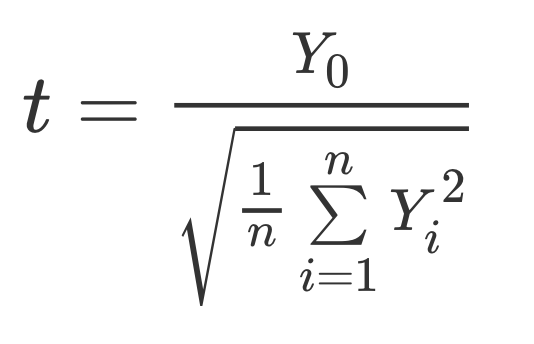

In [50]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None, color="steelblue"):

    colors = ['red' if label == 0 else 'blue' for label in color]
    plt.scatter(
        #S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
         S[:, 0], S[:, 1], alpha=0.4, s=30, edgecolors='k', linewidth=0.5, c=colors
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


def plot_df_samples(df, axis_list=None, color="steelblue"):

    S1 = np.array(df['Column1'])
    S2 = np.array(df['Column2'])
    S1 = S1/S1.std()
    S2 = S2/S2.std()
    color = np.array(df['Column3'])
    colors = ['red' if label == 0 else 'blue' for label in color]

    plt.scatter(
        #S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
         S1, S2, alpha=0.4, s=30, edgecolors='k', linewidth=0.5, c=colors
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")

## dataset #1 - ortho for PCA

In [ ]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.uniform(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.uniform(-1, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #2 - nonortho for ICA

In [ ]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.uniform(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.uniform(-1, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[13, 1], [-1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #3 - gaussian for ICA

In [3]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.normal(0, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.normal(0, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[1, 1], [-1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #3 - dimention reduction - working

In [ ]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.normal(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.normal(3, 3, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

Yc = np.random.normal(4, 1, n_samples)
Xc = np.random.uniform(6,10,n_samples)
Cc = np.ones(n_samples)
C = np.hstack((Xc,Yc))

Yd = np.random.normal(-5, 1, n_samples)
Xd = np.random.uniform(-4,-6,n_samples)
Cd = np.ones(n_samples)
D = np.hstack((Xd,Yd))

X = np.vstack((A,B,C,D))
Cy = np.hstack((Ca,Cb,Cc,Cd))

# original data
X = X.T

#X = X.reshape(-1,2)
#Cy = Cy.reshape(-1,2)

# Mix data
Rotation = np.array([[1, 1, 1, 1], [-1, 1, 1, -1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset#4 - t-destribution

In [ ]:
# T-destribution
n_samples = 10000

rng = np.random.RandomState(42)
X = rng.standard_t(1.5, size=(n_samples, 2))
X[:, 0] *= 2.0

Cb = np.ones(int(n_samples/2))
Ca = np.zeros(int(n_samples/2))
Cy = np.hstack((Ca,Cb))
# Mix data
Rotation = np.array([[0.5, 1], [1, 1]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

# PCA + Kernel PCA

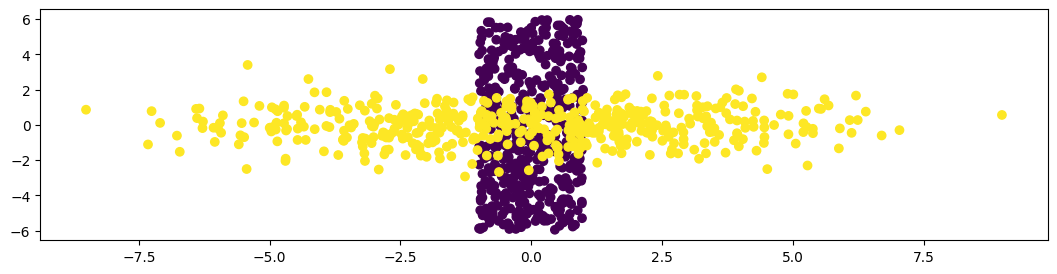

In [51]:
plt.scatter(X[:, 0], X[:, 1],c=Cy)

In [53]:
# Create a dictionary where keys are column names and values are the arrays
data = {'Column1': X[:,0], 'Column2': X[:,1], 'Column3': Cy}

# Create the DataFrame
df = pd.DataFrame(data)

In [54]:
df.head(10)

,Column1,Column2,Column3
0,-0.695929,0.800722,0.0
1,0.182267,-4.101279,0.0
2,0.873999,0.316855,0.0
3,-0.496194,5.002047,0.0
4,-0.124611,-0.687683,0.0
5,-0.335886,-3.641752,0.0
6,-0.284163,-0.649133,0.0
7,-0.330243,-2.958291,0.0
8,0.013599,1.894792,0.0
9,0.824871,-1.858301,0.0


In [55]:
# Shuffle the rows
df_shuffled = df.sample(frac=1)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
      Column1   Column2  Column3
261 -0.788103  5.834165      0.0
567  3.612361  1.004947      1.0
894 -1.305266 -0.985417      1.0
842 -6.771269 -0.610487      1.0
868  0.935331 -0.557037      1.0
..        ...       ...      ...
918  1.358984  0.529700      1.0
454  0.227091  5.403355      0.0
44   0.947096 -2.482041      0.0
108 -0.225167 -4.005503      0.0
566 -3.522191 -0.719057      1.0

[1000 rows x 3 columns]


In [56]:
df_shuffled.head(10)

,Column1,Column2,Column3
261,-0.788103,5.834165,0.0
567,3.612361,1.004947,1.0
894,-1.305266,-0.985417,1.0
842,-6.771269,-0.610487,1.0
868,0.935331,-0.557037,1.0
270,0.749767,5.312551,0.0
275,0.731450,2.841708,0.0
322,-0.198958,5.273265,0.0
935,-0.626615,-0.541572,1.0
309,0.195488,-1.276755,0.0


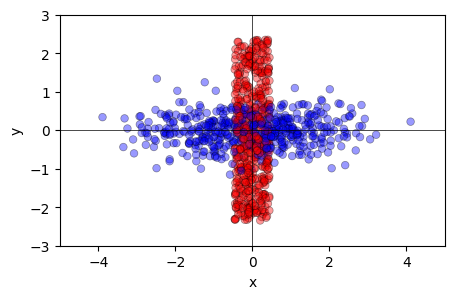

In [57]:
plot_df_samples(df_shuffled)

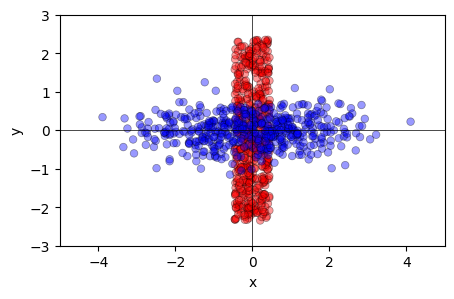

In [58]:
plot_df_samples(df)

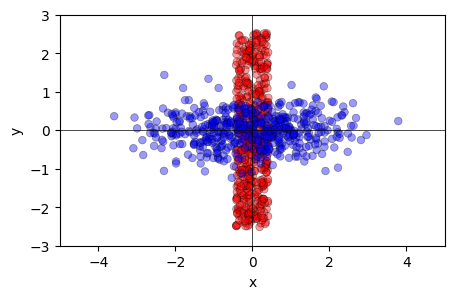

In [59]:
plot_samples(X / X.std(), color = Cy)

Text(0.5, 1.0, 'Observations')

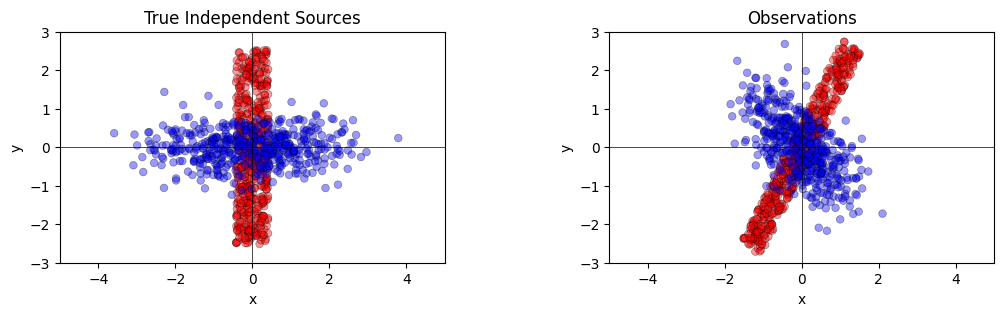

In [60]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X / X.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(Xmixed/ np.std(Xmixed), color=Cy)
plt.title("Observations")




In [61]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xmixed)
print(pca.explained_variance_ratio_)

[0.79861397 0.20138603]


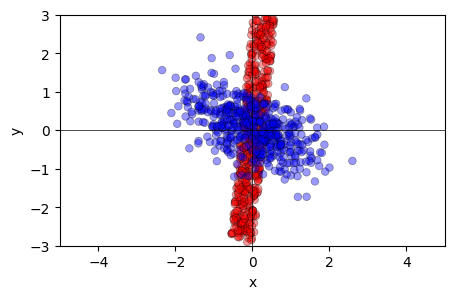

In [62]:
X_pca = np.fliplr(X_pca)
plot_samples(X_pca / X_pca.std(), color = Cy)

Text(0.5, 1.0, 'PCA components done')

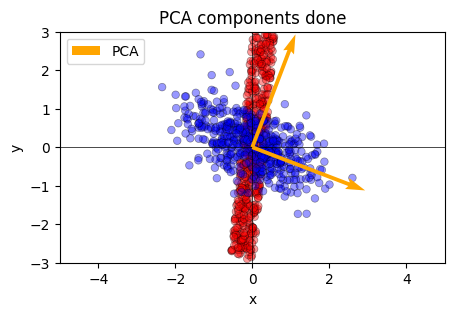

In [63]:
axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X_pca / np.std(X_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("PCA components done")

In [64]:
from scipy.stats import shapiro  #Shapiro test for non-gaussian measure
#it was published in 1965 by Samuel Sanford Shapiro and Martin Wilk

stat, p = shapiro(Xmixed)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)


In [65]:
from scipy.stats import kstest  # It is named after Andrey Kolmogorov and Nikolai Smirnov.

kstest(X, "norm", alternative='less')

KstestResult(statistic=array([0.10319212, 0.13289223]), pvalue=array([5.02126457e-10, 3.66776665e-16]), statistic_location=array([2.01776476, 2.22300379]), statistic_sign=array([-1., -1.]))

In [66]:
#kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’

kernel_pca = KernelPCA(
    n_components=2, kernel="linear", fit_inverse_transform=True, alpha=0.1
)

X_kernel_pca = kernel_pca.fit(Xmixed).transform(Xmixed)

Text(0.5, 1.0, 'Kernel PCA components done')

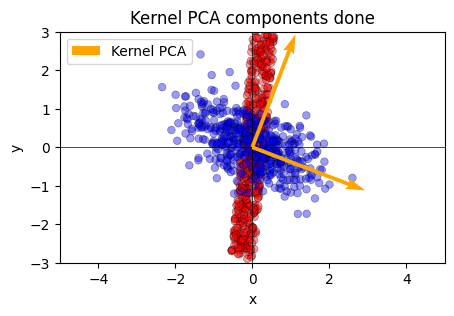

In [67]:
axis_list = [(pca.components_.T, "orange", "Kernel PCA")]
X_kernel_pca = np.fliplr(X_kernel_pca)
plot_samples(X_kernel_pca / np.std(X_kernel_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Kernel PCA components done")

# ICA

In [68]:
#ica = FastICA(n_components=2, random_state=123, whiten="arbitrary-variance")
ica = FastICA(n_components=2, whiten="arbitrary-variance")

#X_ica = ica.fit(Xmixed).transform(Xmixed)  # Estimate the sources
X_ica = ica.fit_transform(Xmixed)  # Estimate the sources

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'ICA components done')

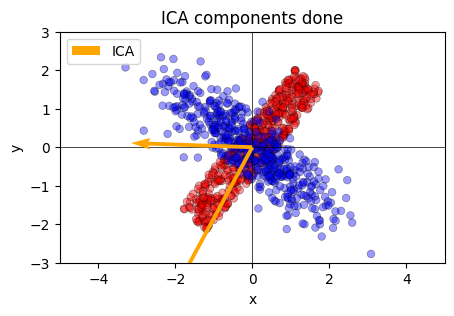

In [69]:
axis_list = [(ica.mixing_.T, "orange", "ICA")]
X_ica = np.fliplr(X_ica)
plot_samples(X_ica / np.std(X_ica), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("ICA components done")

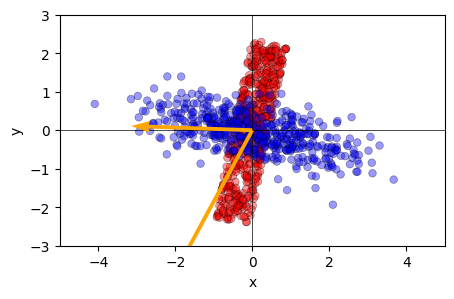

In [70]:
X_ica_pca = pca.fit_transform(X_ica)
X_ica_pca = np.fliplr(X_ica_pca)

plot_samples(X_ica_pca / np.std(X_ica_pca), axis_list=axis_list, color=Cy)

# Compare PCA and ICA

Text(0.5, 1.0, 'Observations')

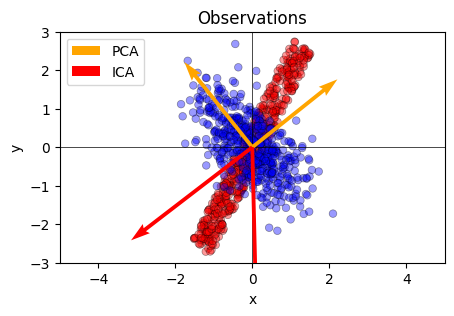

In [71]:
plt.rcParams["figure.figsize"] = (13,3)

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plot_samples(Xmixed / np.std(Xmixed), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

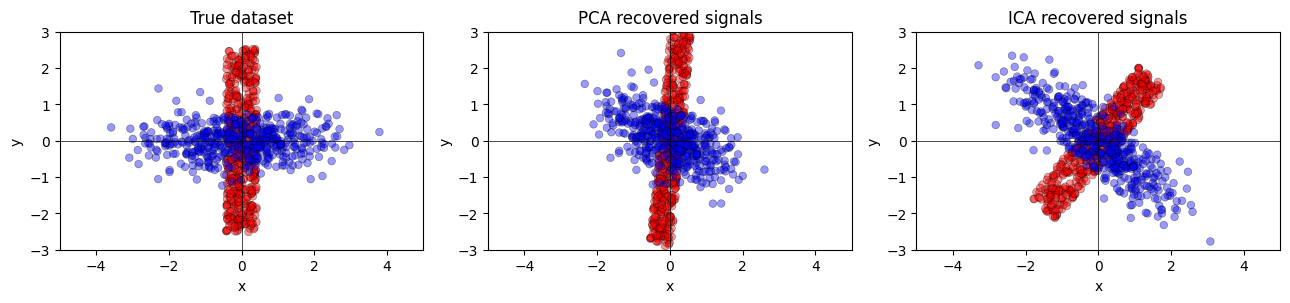

In [72]:
plt.rcParams["figure.figsize"] = (13,5)


plt.subplot(1, 3, 1)
plot_samples(X / X.std(),color=Cy)
plt.title("True dataset")


plt.subplot(1, 3, 2)
plot_samples(X_pca/ np.std(X_pca), color=Cy)
plt.title("PCA recovered signals")


plt.subplot(1, 3, 3)
plot_samples(X_ica / np.std(X_ica), color=Cy)
plt.title("ICA recovered signals")

plt.tight_layout()
plt.show()

# SNE

In [73]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

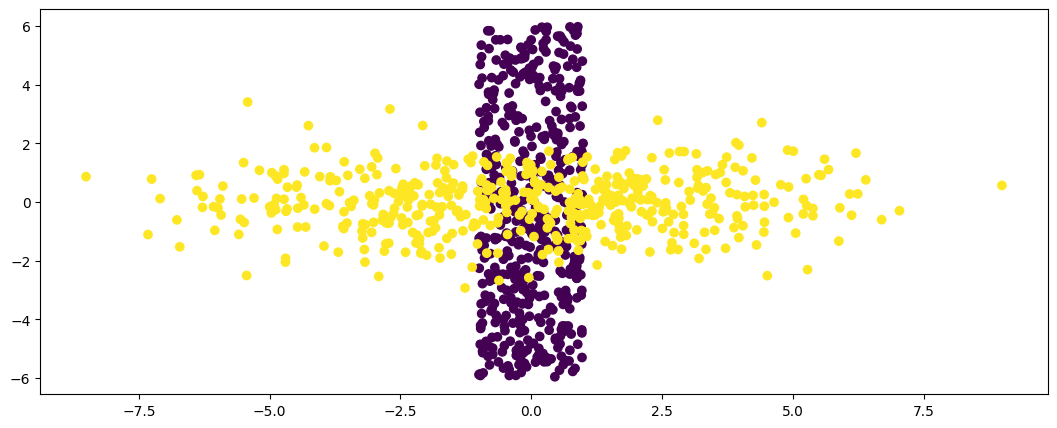

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=Cy)

(np.float64(-9.3838575748464),
 np.float64(9.869184188226303),
 np.float64(-6.554951495580294),
 np.float64(6.567833495576825))

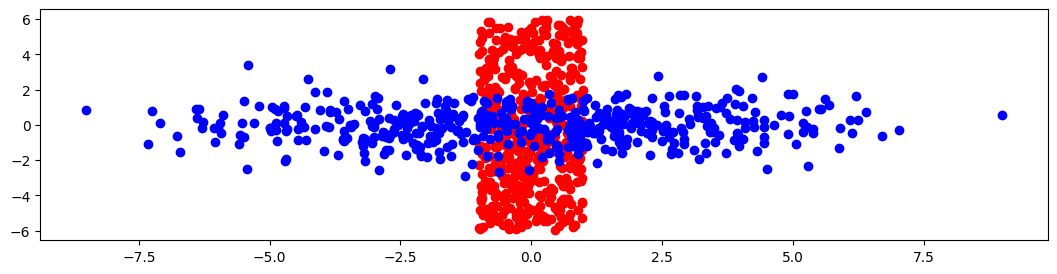

In [75]:
plt.rcParams["figure.figsize"] = (13,3)

red = Cy == 0
blue = Cy == 1

plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")


circles, perplexity=5 in 2.5 sec


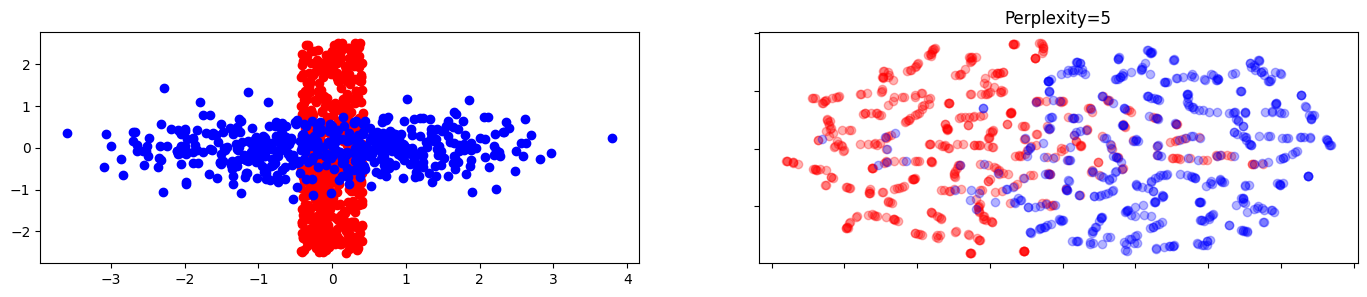

In [76]:
n_components = 2
#perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]
perplexities = [5]

(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(17, 3))

red = Cy == 0
blue = Cy == 1

X = X/np.std(X)

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X/np.std(X))
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r", alpha=0.3)
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b", alpha=0.3)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# DBSCAN